# Kmeans by:

 - Daniela Martínez Quiroga
 - María Isabella Rodríguez Arévalo

## Install libraries

In [ ]:
!pip install -U ydata-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.metrics import silhouette_score, silhouette_samples
from ydata_profiling import ProfileReport
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Load data

In [ ]:
df = pd.read_csv('/datasets/Country-data.csv')
report = ProfileReport(df, title='Profiling Report')
report

According to the report, no missing or null data were found, so no data should be replaced. The data were scaled, as there is a wide range between the minimum and maximum values ​​for the variables. Scaling the variables was chosen instead of normalizing them because the observed distributions of the variables tend to be skewed to the right or left.

In [ ]:
df_scaler = df.drop(columns=['country'])
scaler = MinMaxScaler().fit(df_scaler)
print(f"scale: {scaler.scale_}")
scale = scaler.transform(df_scaler)
df_scaled = pd.DataFrame(scale, columns=df_scaler.columns)
df_scaled['country'] = df['country']
df_scaled

## k-means modeling

In [ ]:
inertias = []
centroids_list = []

X = df_scaled.drop(columns=['country'])

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    centroids_list.append(kmeans.cluster_centers_)
    print(f'K = {k}')
    print('Centroides:\n', kmeans.cluster_centers_)
    print('Inercia:', kmeans.inertia_)
    print('-' * 50)

## Elbow method

The graph of the elbow method shows that the point where inertia begins to decrease most slowly (the elbow of the curve) is at k = 3. From that point on, increasing the number of clusters has no benefit in terms of reducing inertia.

Therefore, the number of clusters for the final model will be 3 to avoid overfitting.

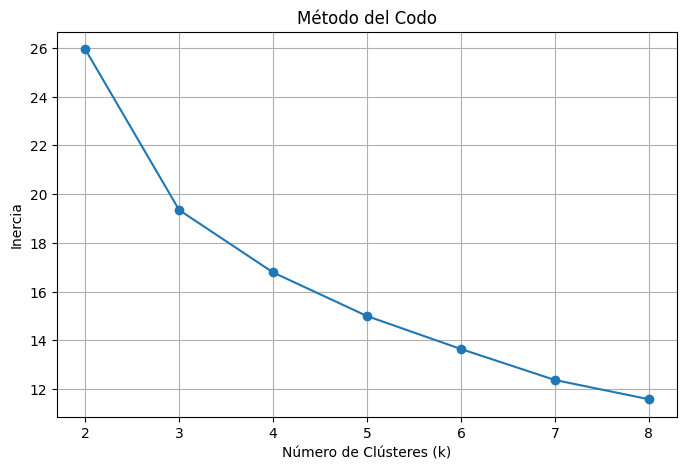

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), inertias, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

## Final model

With k = 3, an average Silhouette Score value of 0.34 is obtained, indicating that the cluster is weak and could be improved, but the elbow method indicates that k = 3 is the optimal value, which could suggest that k-means is not ideal for classifying the present dataset.

In [ ]:
k_opt = 3
kmeans_final = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(X)

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score promedio para k={k_opt}: {silhouette_avg:.2f}")

## Cluster (Colombia)

It should be noted that the order of the variables and their corresponding dictionary meanings are as follows:

1. child_mort: Deaths of children under 5 years of age per 1,000 live births.
2. exports: Exports of goods and services. Expressed as a percentage of total GDP.
3. health: Total health expenditure as a percentage of total GDP.
4. imports: Imports of goods and services. Expressed as a percentage of total GDP.
5. income: Net income per person.
6. inflation: A measure of the annual growth rate of total GDP.
7. life_expec: The average number of years a newborn would live if current mortality patterns remained the same.
8. total_fer: The number of children each woman would have if current age-specific fertility rates remained the same.
9. gdpp: GDP per capita. Calculated by dividing total GDP by total population.

Below is a comparative table of the centroids for each cluster:

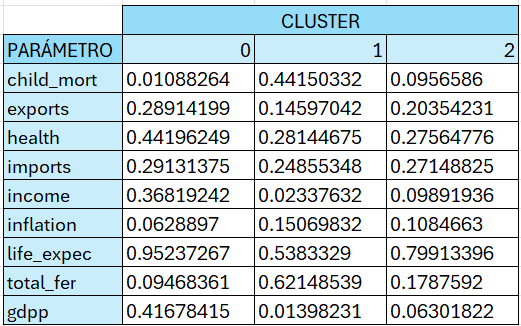

Conclusion:

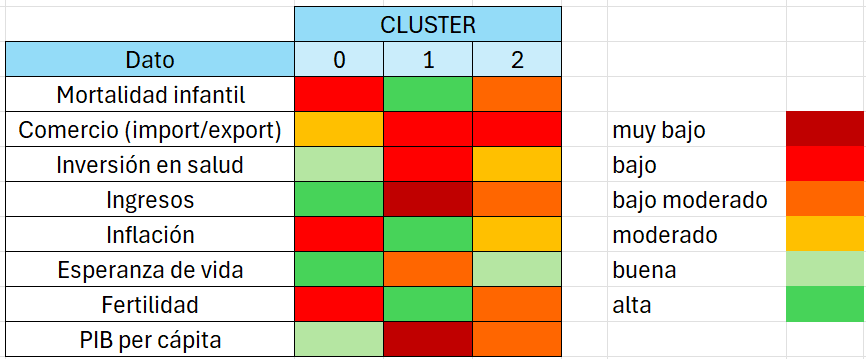

Colombia belongs to Cluster 2, a group of countries that can be considered emerging development, not as far behind as Cluster 1, but still far from being developed.

In [ ]:
df_scaled['cluster'] = labels
colombia_cluster = df_scaled[df_scaled['country'] == 'Colombia']['cluster'].values[0]
print(f"Colombia pertenece al clúster: {colombia_cluster}")

## Decision Tree

In the decision tree, the variables in order of priority are:

### 1
* child_mort: Death of children under 5 years of age per 1,000 live births.

### 2
* gdpp: GDP per capita. Calculated by dividing total GDP by total population.
* total_fer: The number of children each woman would have if current age-specific fertility rates remained the same.

### 3
* total_fer: The number of children each woman would have if current age-specific fertility rates remained the same.
* life_expec: The average number of years a newborn would live if current mortality patterns remained the same.

This result might make sense when compared to real data from Colombia.

In [ ]:
X = df_scaled.drop(columns=['country', 'cluster'])
y = df_scaled['cluster']

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)

plt.figure(figsize=(20, 8))
plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], filled=True)
plt.show()